# Dark Matter Halo
## Preamble:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from IPython.display import Latex

# comment out the following lines if seaborn is not installed
#import seaborn as sns
#sns.set(rc={'text.usetex' : True})
#sns.set_context("paper", font_scale=2)
#sns.set_style("ticks", {'axes.grid': False,
#                        'axes.linewidth': 1.5,
#                        'legend.frameon':True,
#                        'useTex':True})

## Units and Constants

In [2]:
GeV  = 1.
s    = 1.
cm   = 1.
km   = 1.e5*cm
m    = 1.e2*cm
pc   = 3.086e18*cm
kpc  = 1.e3*pc
Mpc  = 1.e6*pc
Msun = 1.11575e57*GeV

#DM density
Omega_m = 0.32 #assuming constant DM density in the Milky Way

#cutoff parameter for halo definition
delta_vir = 18*np.pi**2+82*(Omega_m-1)-39*(Omega_m-1)**2
#without the correction from DM abundance
#delta_vir = 18*np.pi**2

#halo concentration
c_vir = 10

#mass of the Milky Way halo
M = 10**12*Msun

#Hubble constant
H_0 = 70*km/(s*Mpc)
#gravitational constant
G = 4.30091*10**-3*pc*Msun**-1*(km/s)**2  # are we sure of this? - André
#critical density
rho_c = H_0**2*3/(8*np.pi*G)

#virial radius
r_vir = (3*M/(4*np.pi*delta_vir*rho_c))**(1/3)

#distance of Earth from the galactic center
d = 8.122*pc

## Estimates for $r_s$ and $\rho_s$

In [3]:
r_s = r_vir/c_vir

rho_s = M/(4*np.pi*r_s**3*(np.log(1+c_vir)-c_vir/(1+c_vir)))

display(Latex(r'We find that, for the Milky Way halo, '+
              '$r_s='+str(round(r_s/kpc,1))+'$ kpc and '+
              '$\\rho_s='+str(round(rho_s,2))+'$ GeV$/$cm$^3$'))

<IPython.core.display.Latex object>

## Useful functions

In [12]:
def rho_DM(r):
    # Returns DM density following NFW profile
    return rho_s/((r/r_s)*((r/r_s)+1)**2)

#rho_sun = 0.3*GeV/(cm**3)
#def rho_DM(r):
#    return rho_sun/((r/d)*((1+r/r_s)/(1+d/r_s))**2)


def radius(l, psi, theta):
    """
    Returns radius measured from GC as function of:
     - l: distance from Earth
     - psi: angle measured from GC
     """
    return np.sqrt(d**2+l**2-2*d*l*np.cos(psi)*np.cos(theta))


def dJ_dOmega(psi, theta):
    """
    Returns differential J-factor as a function of psi and theta
    """
    l_0 = 0.
    l_f = 500.*kpc
    N = 10000
    dl = (l_f - l_0)/N
    # create array of midpoints
    l_mids = np.linspace(dl/2, l_f-dl/2, N)
    s = np.sum(rho_DM(radius(l_mids, np.radians(psi), np.radians(theta)))**2.*dl)
    return s
print(dJ_dOmega(1.,1.))

5.741105590807447e+24


## Some plots
### NFW Profile

/home/anders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


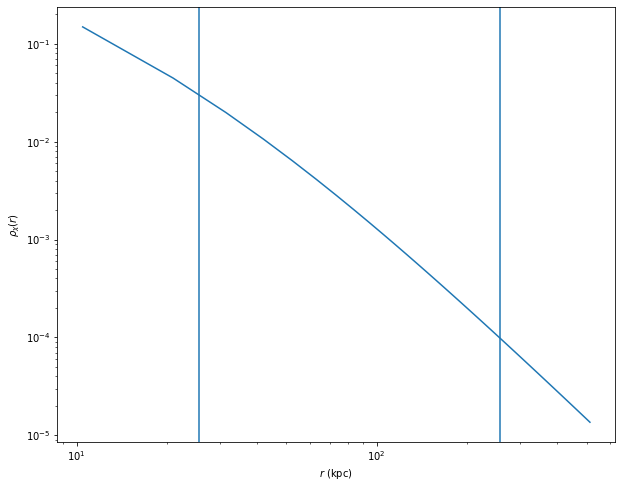

In [5]:
rs = np.linspace(0, 2*r_vir)

plt.figure(figsize=(10,8))
plt.plot(rs/kpc, rho_DM(rs))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho_\chi(r)$')
plt.xlabel(r'$r$ (kpc)')
plt.axvline(r_s/kpc)
#plt.text(r_s/kpc-5.5,1e-5,r'$r_s$',fontsize=30)
plt.axvline(r_vir/kpc)
#plt.text(r_vir/kpc-75,1e-5,r'$r_{vir}$',fontsize=30)
plt.show()

### Differential $J$-factor as a function of angle $\psi$

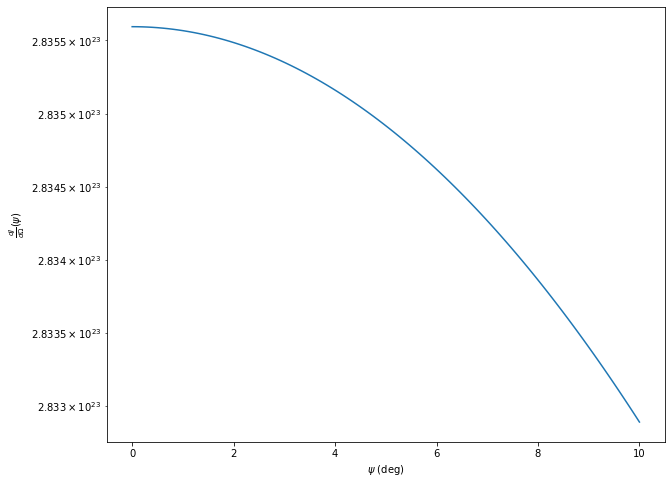

1.4177945019932159e+23


In [6]:
# Plot dJ_dOmega for various psis
psis = np.linspace(0, 10, num=100)
dJ_dOmega_vect = []
for psi in psis:
    dJ_dOmega_vect.append(dJ_dOmega(psi,0))
    
plt.figure(figsize=(10,8))
plt.plot(psis, dJ_dOmega_vect,0)
plt.yscale('log')
plt.xscale('linear')
plt.ylabel(r'$\frac{dJ}{d\Omega}(\psi)$')
plt.xlabel(r'$\psi$ (deg)')
plt.show()

## Computing $J$ around GC

n = 10
psi_vect= np.linspace(-0.5, 0.5, n)
theta_vect = np.linspace(-0.5, 0,5, n)

J_vect = np.zeros((n,n))

for i in range(len(psi_vect)):
    for j in range(len(theta_vect)):
        J_vect[i,j] = dJ_dOmega(psi_vect[i],theta_vect[j])
print(np.mean(J_vect))

#def J_GC_alt(psi_lim, theta_lim):
    
#psi_lim = 0.5  # in degrees
#theta_lim = 0.5 # in degrees


#display(Latex(r'We find that, within '+str(psi_lim)+' degrees of '+
#              'GC, $J$ is $'+str(round(J_GC(psi_lim,theta_lim,0.01)*10**-23,1))+'\\times 10^{23} \; GeV^2 cm^{-5}$'))